In [1]:
# import the libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# resize the image size
image_size=[224,224]
train_path='Dataset/train'
test_path='Dataset/test'

In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
#+ [3] indicates RGB channel 
resnet = ResNet50(input_shape=image_size+[3],weights='imagenet',include_top=False)

94773248/94765736 [==============================] - 26s 0us/step


In [6]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [7]:
# 1st layer will be my input category and last layer will be number of my outpul category

In [8]:
for layer in resnet.layers:
    layer.trainable = False
#this means i dont want to train my data itself    

In [10]:
#use to count how many folders are present i.e output category
folders=glob('Datasets/train/*')
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [13]:
#now we need to flattern the output got from resnet function
x= Flatten()(resnet.output)

In [14]:
prediction=Dense(len(folders),activation='softmax')(x)

#create model object
model= Model(inputs=resnet.input,outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [19]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [20]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [22]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

c:\users\dell\firstproject\car_classification\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 32s 18s/step - loss: 4.6300 - accuracy: 0.3281 - val_loss: 8.3317 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 22s 15s/step - loss: 8.5441 - accuracy: 0.3906 - val_loss: 1.1145 - val_accuracy: 0.4655
Epoch 3/50
2/2 [==============================] - 22s 16s/step - loss: 2.7590 - accuracy: 0.4531 - val_loss: 6.5337 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 23s 16s/step - loss: 5.6348 - accuracy: 0.3438 - val_loss: 4.6051 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 22s 16s/step - loss: 3.6028 - accuracy: 0.4688 - val_loss: 1.7807 - val_accuracy: 0.2069
Epoch 6/50
2/2 [==============================] - 22s 15s/step - loss: 2.0495 - accuracy: 0.4219 - val_loss: 5.1654 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 22s 15s/step - loss: 3.3538 - accuracy: 0.4062 - val_loss: 1.4669 - val_accuracy: 0.3621
Epoch 8/50
2/2 [===========

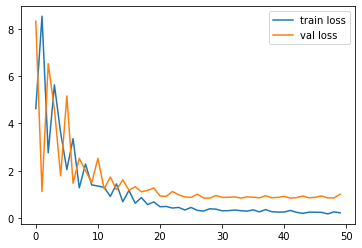

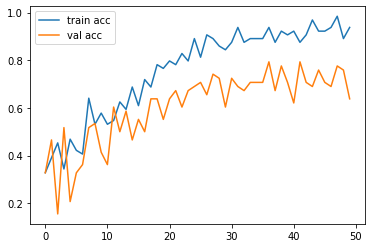

<Figure size 432x288 with 0 Axes>

In [23]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [34]:
y_pred=model.predict(test_set)
y_pred

array([[1.33652713e-06, 1.84292017e-04, 9.99814451e-01],
       [8.54849279e-01, 3.69616933e-02, 1.08188972e-01],
       [5.32410704e-02, 1.79125458e-01, 7.67633498e-01],
       [8.84104054e-03, 4.40641190e-04, 9.90718305e-01],
       [2.57481169e-02, 4.77531217e-02, 9.26498771e-01],
       [4.82207127e-02, 6.65835261e-01, 2.85943985e-01],
       [1.08024133e-02, 8.38767767e-01, 1.50429830e-01],
       [5.09443879e-01, 1.39405563e-01, 3.51150542e-01],
       [2.91817598e-02, 8.54874194e-01, 1.15944050e-01],
       [3.33940759e-02, 5.95465675e-03, 9.60651278e-01],
       [2.67055660e-01, 6.24072969e-01, 1.08871348e-01],
       [1.28784142e-02, 5.10762297e-02, 9.36045349e-01],
       [8.11176151e-02, 1.20273128e-01, 7.98609197e-01],
       [5.67673100e-03, 6.62877166e-04, 9.93660390e-01],
       [1.18015133e-01, 4.70377773e-01, 4.11607146e-01],
       [1.67653430e-02, 2.62769312e-01, 7.20465302e-01],
       [1.37835845e-01, 3.26688498e-01, 5.35475612e-01],
       [5.21194702e-03, 8.42348

In [35]:
import numpy as np
y_pred = np.argmax(y_pred,axis=1)

In [39]:
y_pred
#this is the output for test data

array([2, 0, 2, 2, 2, 1, 1, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 0, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1], dtype=int64)

In [40]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [41]:
model=load_model('model_resnet50.h5')

In [43]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

In [44]:
x= image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [194., 188., 174.],
        [215., 209., 197.],
        [241., 235., 223.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [247., 245., 233.],
        [245., 242., 233.],
        [244., 241., 232.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 248., 241.],
        [244., 250., 248.],
        [244., 250., 248.]],

       ...,

       [[190., 206., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[187., 205., 227.],
        [187., 205., 227.],
        [187., 205., 227.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [187., 2

In [45]:
x=x/255

In [46]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [47]:
model.predict(img_data)
a=np.argmax(model.predict(img_data), axis=1)

In [48]:
a

array([2], dtype=int64)